1 integralj: 421.49353454694614 ;  errorj: 116.39153087307031
   integral for 1 iterations: 421.49353454694614 ;  error: 116.39153087307031 

2 integralj: 312.60880970782983 ;  errorj: 92.67957237908097
   integral for 2 iterations: 367.05117212738793 ;  error: 74.40164570928158 

3 integralj: 244.75682439929943 ;  errorj: 49.43582679825485
   integral for 3 iterations: 326.28638955135847 ;  error: 52.27734915622392 

4 integralj: 310.4855249898658 ;  errorj: 76.9664180512645
   integral for 4 iterations: 322.3361734109853 ;  error: 43.67515588935287 

5 integralj: 611.0184640854712 ;  errorj: 245.87976392687804
   integral for 5 iterations: 380.0726315458825 ;  error: 60.34694230929846 

6 integralj: 254.715988324963 ;  errorj: 66.16522116216866
   integral for 6 iterations: 359.17985767572924 ;  error: 51.48753028201297 

7 integralj: 227.62964156290093 ;  errorj: 49.92853486842164
   integral for 7 iterations: 340.38696965961094 ;  error: 44.708228646908886 

8 integralj: 515.620734

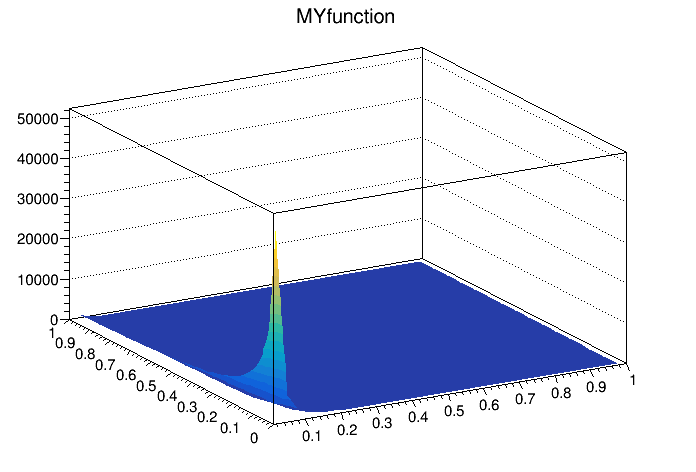

In [19]:
import sys
import ROOT,math
from ROOT import gRandom, TCanvas, TFormula, TF1, TH1F
from math import tan, sqrt, atan , sin
canvas = ROOT.TCanvas()

ax =0.01
bx =1
ay = 0
by = 1
def myfunc(var,p) :
    x = var[0]
    y = var[1]
    a = p[0]
    return a/(x*x*(y+ sin(x)*0.5))

ff = ROOT.TF2("MYfunction", myfunc, ax, bx, ay, by, 1)

ff.SetParameter(0, 1)
ff.GetParameter(0)

ff.Draw("surf2")
canvas.Draw()

ff(ax,ay)



sumf = 0 
sumf2 = 0 

number = 1000

for j in range (1, 11):
    
    sumfj = 0 
    sumfj2 = 0 
    
    for i in range (0, number):
        
        xi = ROOT.gRandom.Uniform(ax, bx)
        yi = ROOT.gRandom.Uniform(ay, by)
        fi = ff(xi, yi)
        
        sumfj = sumfj + fi*(bx - ax)*(by - ay)
        sumfj2 = sumfj2 + (fi*(bx - ax)*(by - ay))**2
        
    sumf = sumf + sumfj
    sumf2 = sumf2 + sumfj2
    
    integralj = sumfj/number #integral value in j iteration
    integral = sumf/(j*number) #total integral value after j iterations
    
    
    Dj = sumfj2/number - (integralj)**2
    errorj = math.sqrt(Dj/number) #error in j iteration
    
    D = sumf2/(j*number) - (integral)**2
    error = math.sqrt(D/(j*number)) #total error after j iterations
    
    
    print(j, "integralj:", integralj, ";  errorj:", errorj)
    print("   integral for", j, "iterations:", integral, ";  error:", error, "\n")
    
    

    

In [22]:
print("Total integral value: ", integral)
print("Total error: ", error)

Total integral value:  558.9081920001988
Total error:  131.2795761635219


1 integral: 345.1114093731925 ;  error: 142.13121140319996
   integral for 1 iterations: 345.1114093731925 ;  error: 142.13121140319996 

2 integral: 436.955466564743 ;  error: 30.529147729401238
   integral for 2 iterations: 391.03343796896775 ;  error: 72.69375451413522 

3 integral: 398.90359432649007 ;  error: 47.541324092214545
   integral for 3 iterations: 393.6568234214752 ;  error: 50.98773988888984 

4 integral: 470.0795442146776 ;  error: 10.25756194176047
   integral for 4 iterations: 412.76250361977577 ;  error: 38.33026258060735 

5 integral: 449.21636459489616 ;  error: 13.428553126144903
   integral for 5 iterations: 420.05327581479986 ;  error: 30.782289465352388 

6 integral: 370.25760278000075 ;  error: 55.658054599028425
   integral for 6 iterations: 411.75399697566667 ;  error: 27.27871524795504 

7 integral: 463.6251142510308 ;  error: 13.373344887705963
   integral for 7 iterations: 419.16415658643297 ;  error: 23.460679911628805 

8 integral: 420.7560704179864 ; 

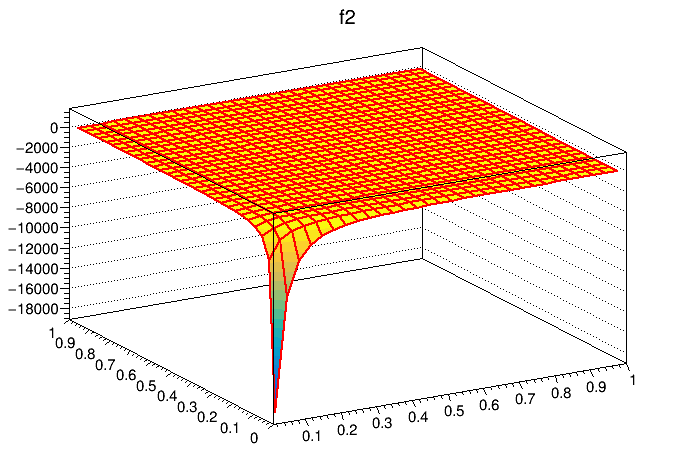

In [20]:
import sys
import ROOT,math
from ROOT import gRandom, TCanvas, TFormula, TF1, TH1F
from math import tan, sqrt, atan , sin
canvas = ROOT.TCanvas()

ax =0.01
bx =1
ay = 0
by = 1

c=0.005


def f1_integral(ax, bx, ay, by):
    result = -1*(1/bx - 1/ax)*math.log((by + c)/(ay + c))
    return result


def func2(var, p):
    x = var[0]
    y = var[1]
    a = p[0]
    return a*(c - 0.5*math.sin(x))/((x**2)*(y + 0.5*math.sin(x))*(y + c))


f2 = ROOT.TF2("f2", func2, ax, bx, ay, by, 1)
f2.SetParameter(0, 1)

f2.Draw("surf1")
canvas.Draw()

f2_sumf = 0 #total sum of f2 values*(bx - ax)*(by - ay)
f2_sumf2 = 0 #total sum of f2 values*(bx - ax)*(by - ay) squared

number = 1000

for j in range (1, 11):
    
    f2_sumfj = 0 #f2 values*(bx - ax)*(by - ay) sum in j iteration
    f2_sumfj2 = 0 #total sum of f2 values squared in j iteration
    
    for i in range (0, number):
        
        xi = ROOT.gRandom.Uniform(ax, bx)
        yi = ROOT.gRandom.Uniform(ay, by)
        fi = f2(xi, yi)
        
        f2_sumfj = f2_sumfj + fi*(bx - ax)*(by - ay)
        f2_sumfj2 = f2_sumfj2 + (fi*(bx - ax)*(by - ay))**2
    
    f2_sumf = f2_sumf + f2_sumfj
    f2_sumf2 = f2_sumf2 + f2_sumfj2
    
    integralj = f1_integral(ax, bx, ay, by) + f2_sumfj/number #integral value in j iteration
    integral = f1_integral(ax, bx, ay, by) + f2_sumf/(j*number) #total integral value after j iterations
    
    
    Dj = f2_sumfj2/number - (f2_sumfj/number)**2
    errorj = math.sqrt(Dj/number) #error in j iteration
    
    D = f2_sumf2/(j*number) - (f2_sumf/(j*number))**2
    error = math.sqrt(D/(j*number)) #total error after j iterations
    
    
    print(j, "integral:", integralj, ";  error:", errorj)
    print("   integral for", j, "iterations:", integral, ";  error:", error, "\n")